# Ridge Regression 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
# loading the datas
data = load_diabetes()

In [5]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
# splitting the datas into x and y
X = data.data
y = data.target

In [10]:
from sklearn.model_selection import train_test_split
x_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [11]:
# applying linear regression
from sklearn.linear_model import LinearRegression

In [12]:
L = LinearRegression()

In [13]:
# fitting the model
L.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred = L.predict(X_test)

In [16]:
# accuracy
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score = ",r2_score(y_test,y_pred))
print("Means squared error = ",np.sqrt(mean_squared_error(y_test,y_pred)))


R2 score =  0.5188113124539249
Means squared error =  48.72713760953252


In [17]:
# applying ridge regression
from sklearn.linear_model import Ridge

In [18]:
R = Ridge(alpha=0.0001)

In [19]:
R.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [20]:
y_pred1 = R.predict(X_test)

In [21]:
# accuracy

print("R2 score = ",r2_score(y_test,y_pred1))
print("Means squared error = ",np.sqrt(mean_squared_error(y_test,y_pred1)))


R2 score =  0.5189732635884952
Means squared error =  48.71893700181955


In [22]:
m=100
x1 = 5 * np.random.rand(m,1)-2
x2 = 0.7 * x1 ** 2 - 2 * x1 +3 + np.random.randn(m,1)

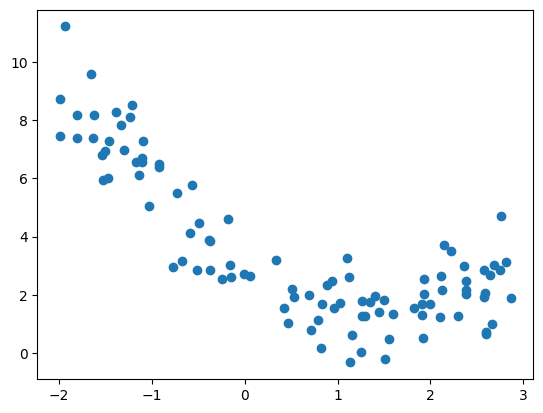

In [23]:
plt.scatter(x1,x2)
plt.show()

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


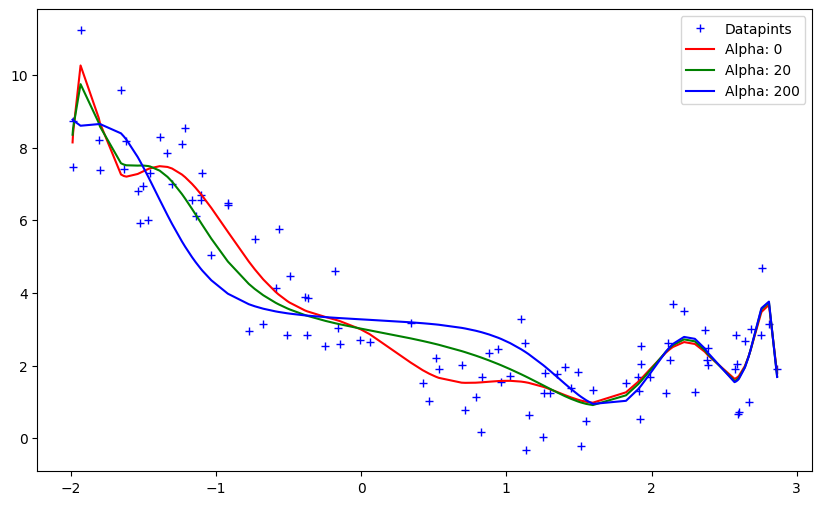

In [36]:
def get_preds_ridge(x1,x2,alpha):
    model = Pipeline([
        ('poly_feats',PolynomialFeatures(degree=16)),
        ('ridge',Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas = [0,20,200]
cs = ['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

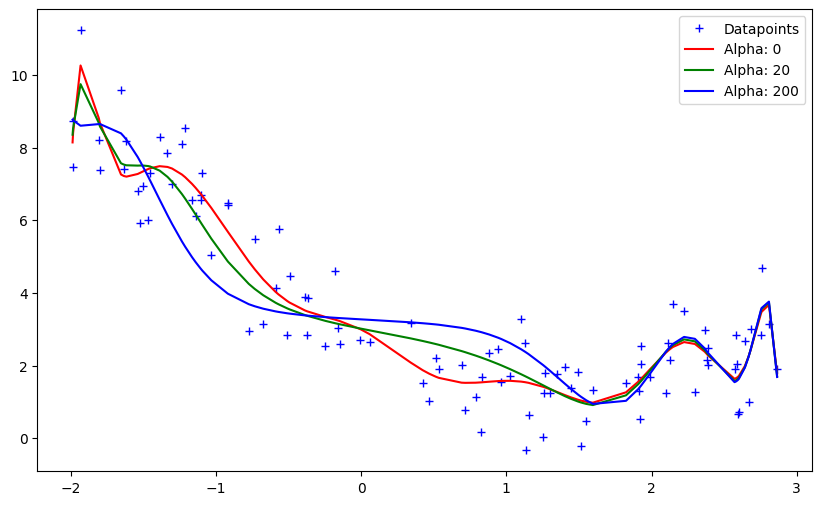

In [34]:
def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


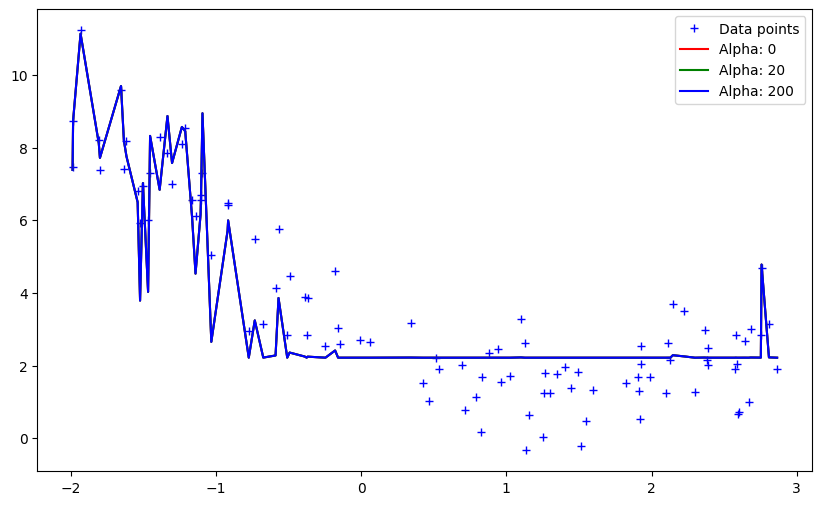

In [40]:
def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    X = np.column_stack((x1, x2))  # Combine x1 and x2 into a 2D array
    model.fit(X, x2)  # Fit the model using the combined 2D array and the target x2
    return model.predict(X)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Data points')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)

    # Plot
    plt.plot(np.sort(x1[:,0]), preds[np.argsort(x1[:,0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()